# Imports, helper functions

In [1]:
import numpy as np, matplotlib.pyplot as plt
import pandas as pd
import numba
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Visualize a 2d function
def plot_surface(func,x_min=-2,x_max=2,y_min=-2,y_max=2):
    x = np.linspace(x_min,x_max,100)
    y = np.linspace(y_min,y_max,100)
    X,Y = np.meshgrid(x,y)
    Z = func([X,Y])
    
    fig = plt.figure(figsize=(6,3))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X,Y,Z, alpha=0.9)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # ax.view_init(60,60) # set angles for viewing
    plt.tight_layout()
    plt.show()

/var/folders/kj/jgvpvl2x0pj7x_3xrc02tpt00000gn/T/ipykernel_9077/278787950.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Question 1

The D-dimensional Schwefel function:<br>
$$f(x_1,x_2,...x_D)=418.9829D-\sum_i^D{x_i \sin \left( \sqrt{|x_i|} \right) }$$
$$x_i\in[-500,500] \text{ for } i=1,2,...D$$

The global minimum is 0, which is reached at $x_i=420.9687$


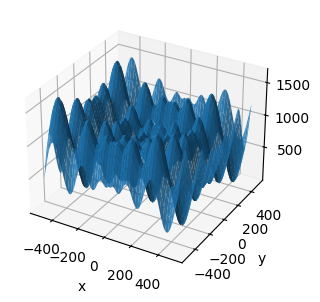

In [2]:
def schwefel(point):
    """
    Implementation of the Schwefel Function
    """
    D = len(point)
    term1 = 418.9829*D
    term2 = (point * np.sin(np.sqrt(np.abs(point)))).sum(0)
    # return 418.9829*d - np.sum(in_array*np.sin(np.sqrt(np.abs(in_array))), axis = 0)
    return  term1 - term2

plot_surface(schwefel, -500, 500, -500, 500)

In [3]:
def SA(solution,evaluation,delta,boundary,cooling_schedule,verbose=False):
    """ Simulated Annealing for minimization
    solution: np.array. Initial guess of solution
    evaluation: func. Function to evaluate solution
    delta: float. Magnitude of random displacement
    boundary: array of int/float. [lowerbound,upperbound]
    cooling_schedule: np.array. An array of temperatures for simulated annealing
    """
    best_solution = solution.copy() 
    lowest_eval = evaluation(best_solution)
    for idx,temp in enumerate(cooling_schedule):
        if idx%500 == 0 and verbose:
            print(f'{str(idx).zfill(len(str(len(cooling_schedule))))}/{len(cooling_schedule)}   temp:{temp:.1f}, lowest_eval:{lowest_eval:.3f}')
        for n in range(len(solution)):
            trial = solution.copy()
            trial[n] += delta*(2*np.random.random()-1)
            if trial[n] >= boundary[0] and trial[n] <= boundary[1]:
                #fill in acceptance criterion
                if np.exp(-(evaluation(trial)-evaluation(solution))/temp) > np.random.random():
                    solution = trial
                    if evaluation(solution) < lowest_eval:
                        #update solution here
                        best_solution = solution.copy()
                        lowest_eval = evaluation(best_solution)
    return {"solution":best_solution, "evaluation":lowest_eval}

## 1.a

Cooling to 10k takes 5980 steps
Cooling to 30k takes 5940 steps


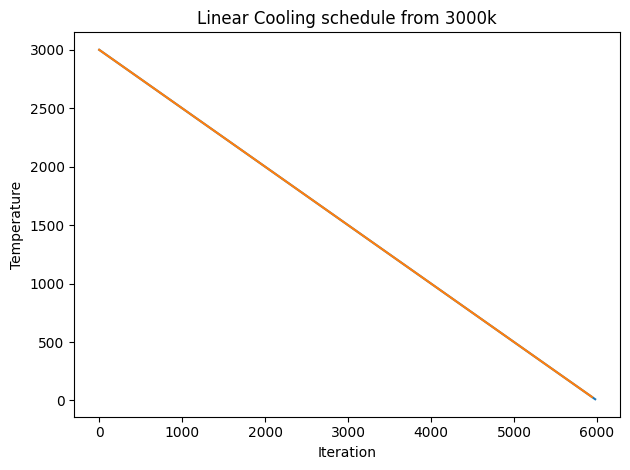

In [4]:
cooling_schedule_10k = np.arange(3000, 10, -0.5)
cooling_schedule_30k = np.arange(3000, 30, -0.5)
starting_point = (np.random.random(10)*2-1)*500

print(f'Cooling to 10k takes {len(cooling_schedule_10k)} steps')
print(f'Cooling to 30k takes {len(cooling_schedule_30k)} steps')

plt.plot(range(len(cooling_schedule_10k)), cooling_schedule_10k, label='10k')
plt.plot(range(len(cooling_schedule_30k)), cooling_schedule_30k, label='30k')
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.title("Linear Cooling schedule from 3000k")
plt.tight_layout()

In [5]:
SA(starting_point, schwefel, 0.5, [-500, 500], cooling_schedule_10k, True)

0000/5980   temp:3000.0, lowest_eval:3668.288
0500/5980   temp:2750.0, lowest_eval:3583.019
1000/5980   temp:2500.0, lowest_eval:3572.713
1500/5980   temp:2250.0, lowest_eval:3572.713
2000/5980   temp:2000.0, lowest_eval:3572.713
2500/5980   temp:1750.0, lowest_eval:3572.713
3000/5980   temp:1500.0, lowest_eval:3572.713
3500/5980   temp:1250.0, lowest_eval:3572.713
4000/5980   temp:1000.0, lowest_eval:3572.713
4500/5980   temp:750.0, lowest_eval:3572.713
5000/5980   temp:500.0, lowest_eval:3572.713
5500/5980   temp:250.0, lowest_eval:3572.713


{'solution': array([  44.18394533,  202.26205221,  184.90755705, -260.74246686,
        -212.85168652, -449.76514109,  387.05738054,  452.91557843,
          61.63541578,   38.94683068]),
 'evaluation': 3572.712945491842}

In [6]:
SA(starting_point, schwefel, 0.5, [-500, 500], cooling_schedule_30k, True)

0000/5940   temp:3000.0, lowest_eval:3668.288
0500/5940   temp:2750.0, lowest_eval:3573.826
1000/5940   temp:2500.0, lowest_eval:3523.142
1500/5940   temp:2250.0, lowest_eval:3395.897
2000/5940   temp:2000.0, lowest_eval:3306.030
2500/5940   temp:1750.0, lowest_eval:3306.030
3000/5940   temp:1500.0, lowest_eval:3306.030
3500/5940   temp:1250.0, lowest_eval:3306.030
4000/5940   temp:1000.0, lowest_eval:3306.030
4500/5940   temp:750.0, lowest_eval:3306.030
5000/5940   temp:500.0, lowest_eval:3306.030
5500/5940   temp:250.0, lowest_eval:3306.030


{'solution': array([  48.35765655,  207.51828055,  212.47226135, -255.97045448,
        -216.15720943, -475.65629105,  395.59941098,  457.40412627,
          43.67130283,   51.91186193]),
 'evaluation': 3306.029756859302}

In [15]:
eval_10k = []
eval_30k = []

for _ in range(5):
    dic1 = SA(starting_point, schwefel, 0.5, [-500, 500], cooling_schedule_10k)
    dic2 = SA(starting_point, schwefel, 0.5, [-500, 500], cooling_schedule_30k)
    eval_10k.append(dic1['evaluation'])
    eval_30k.append(dic2['evaluation'])
    
print(f'Cooling to 10k gives an average evaluation of {np.mean(eval_10k):.2f}')
print(f'Cooling to 30k gives an average evaluation of {np.mean(eval_30k):.2f}')

Cooling to 10k gives an average evaluation of 3461.13
Cooling to 30k gives an average evaluation of 3453.91


Result from cooling to $10K$ is similar to results from cooling to $30K$ because in linear cooling to lower tempreture is just adding a little more steps at the end. Furthermore, the values achieved by simply using linear SA are still far from the global minimum (which is zero).

## 1.b

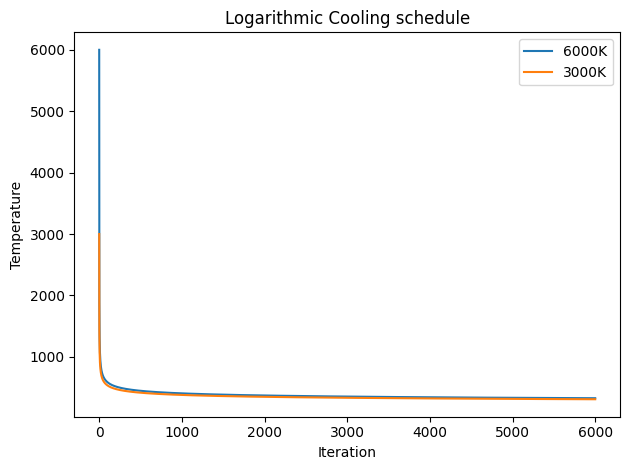

In [8]:
def log_cooling_schedule(initial_temp, num_cycle, sigma):
    k = np.arange(num_cycle)
    return initial_temp / (1 + initial_temp*np.log(1+k)/(3*sigma))

log_cooling_3000K = log_cooling_schedule(3000, 6000, 1000)
log_cooling_6000K = log_cooling_schedule(6000, 6000, 1000)

plt.plot(range(len(log_cooling_6000K)), log_cooling_6000K, label='6000K')
plt.plot(range(len(log_cooling_3000K)), log_cooling_3000K, label='3000K')
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.title("Logarithmic Cooling schedule")
plt.legend()
plt.tight_layout()

In [14]:
eval_3000k = []
eval_6000k = []

for _ in range(5):
    dic1 = SA(starting_point, schwefel, 0.5, [-500, 500], log_cooling_3000K)
    dic2 = SA(starting_point, schwefel, 0.5, [-500, 500], log_cooling_6000K)
    eval_3000k.append(dic1['evaluation'])
    eval_6000k.append(dic2['evaluation'])
    
print("Log cooling from 3000k gives an average evaluation of %.2f"%np.mean(eval_3000k))
print("Log cooling from 6000k gives an average evaluation of %.2f"%np.mean(eval_6000k))

Log cooling from 3000k gives an average evaluation of 3256.87
Log cooling from 6000k gives an average evaluation of 3245.27


The logarithmic cooling schedules converge to slightly better results than linear cooling. And the lower temperature logarithmic cooling gives better result. However, due to the stochastic nature of the SA algorithm you might not see this in your results, if you try enough times this trend should hold.

## 1.c

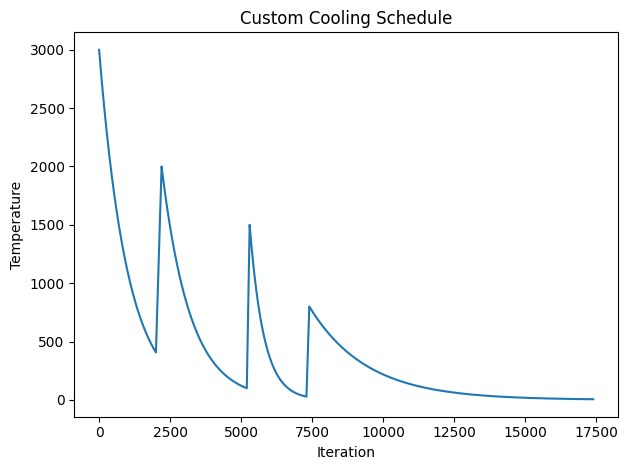

In [10]:
schedule = 0.999**np.arange(2000)*3000
schedule = np.append(schedule,np.linspace(schedule[-1],2000,200))
schedule = np.append(schedule,0.999**np.arange(3000)*schedule[-1])
schedule = np.append(schedule,np.linspace(schedule[-1],1500,100))
schedule = np.append(schedule,0.998**np.arange(2000)*schedule[-1])
schedule = np.append(schedule,np.linspace(schedule[-1],800,100))
schedule = np.append(schedule,0.9995**np.arange(10000)*schedule[-1])
plt.plot(schedule)
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.title("Custom Cooling Schedule")
plt.tight_layout()

In [11]:
SA_solutions=[]
SA_evaluations=[]
CG_solutions=[]
CG_evaluations=[]
for _ in range(5):
    sa_res=SA(starting_point,schwefel,0.5,[-500,500],schedule)
    SA_solutions.append(sa_res['solution'])
    SA_evaluations.append(sa_res['evaluation'])
    CG_res=minimize(schwefel,sa_res['solution'],method='CG',options={"gtol":1e-5})
    CG_solutions.append(CG_res.x)
    CG_evaluations.append(CG_res.fun)
    
print("Custom Cooling Schedule gives an average evaluation of %.2f"%np.mean(SA_evaluations))
print("Custom Cooling Schedule with CG gives an average evaluation of %.2f"%np.mean(CG_evaluations))

Custom Cooling Schedule gives an average evaluation of 2045.74
Custom Cooling Schedule with CG gives an average evaluation of 1614.84


From this example, we can see that heating up and cooling again for several times definitely help with finding better solution, and local minimization on top of that gives even better solution.

# Question 2

## 2.a

Taking $f(x)>27$ as the standard for a good solution, in the integer regime the good solutions are 3,4,5. The encodings in two different methods are:<br>
<table>
<tr><td>Solution</td><td>Encoding A</td><td>Encoding B</td></tr>
<tr><td>3</td><td>1000</td><td>1101</td></tr>
<tr><td>4</td><td>0010</td><td>1011</td></tr>
<tr><td>5</td><td>0001</td><td>1111</td></tr>
</table>

Length is the distance between the first and the last specific string position, and order is the number of fixed positions present in the template. From the table we can see the schema for encoding A is ``*0**``, which has length 0 and order 1. The schema for encoding B is ``1**1``, which has length 3 and order 2. A good encoding should have both short length and small order. So encoding A is preferred.

## 2.b

Initialize the population with candidate solutions: $x=10,x=1,x=15,x=6,x=0,x=9$<br>

| x    | Fitness   | Vector |
|------|-----------|-----------|
|   10  | -5|  0101|
|   1  | 22|  0011|
|   15  | -90|  1111|
|   6  | 27|  0000|
|   0  | 15| 1011|
|   9  | 6|  1100|

In [17]:
def fitness(x):
    return -x**2 + 8*x + 15
    
def evaluate_population(pop):
    # sort polpulation by their fitness
    pop_copy = pop.copy()
    pop_copy.sort(key = fitness,reverse=True)
    
    print("Solutions    Vector      Fitness")
    for sol in pop_copy:
        print("%-13d%-13s%-6d"%(sol,vector_dict[sol],fitness(sol)))
    print("="*20)
    print("Total fitness:",sum([fitness(sol) for sol in pop_copy]))
    print(f'Best solution: {pop_copy[0]} with fitness {fitness(pop_copy[0])}')
    
# decoding based on encoding A: vector -> solution
solution_dict = {
    "1011": 0, "0011": 1, "1001": 2, "1000": 3,
    "0010": 4, "0001": 5, "0000": 6, "1010": 7,
    "0100": 8, "1100": 9, "0101":10, "0110":11,
    "0111":12, "1101":13, "1110":14, "1111":15,
}

# encoding A: solution -> vector
vector_dict = dict(zip(solution_dict.values(),solution_dict.keys()))

# initial population
pop = [10,1,15,6,0,9]
pop.sort(key = fitness,reverse=True) # sort by fitness
evaluate_population(pop)

print('\nPairs of solutions (fittest + least fit)')
for i in range(3):
    print(f'    {pop[i]}   {pop[-1-i]}')


Solutions    Vector      Fitness
6            0000         27    
1            0011         22    
0            1011         15    
9            1100         6     
10           0101         -5    
15           1111         -90   
Total fitness: -25
Best solution: 6 with fitness 27

Pairs of solutions (fittest + least fit)
    6   15
    1   10
    0   9


## 2.c

In [18]:
def one_point_crossover(vec1, vec2, point):
    '''1-point cross-over operator for string/vector'''
    return (vec1[:point]+vec2[point:], vec2[:point]+vec1[point:])

offsprings_2c = []
for i in range(3):
    parent1 = vector_dict[pop[i]]
    parent2 = vector_dict[pop[-1-i]]
    offsprings_2c.extend([solution_dict[vec] for vec in one_point_crossover(parent1,parent2,1)])
evaluate_population(offsprings_2c)



Solutions    Vector      Fitness
3            1000         30    
1            0011         22    
0            1011         15    
9            1100         6     
10           0101         -5    
12           0111         -33   
Total fitness: 35
Best solution: 3 with fitness 30


New solutions are generated, and their fitness are given above. The fitness as a whole is also increased (from -25 to 35), and now the best solution (solution=3) has the highest fitness.

## 2.d


In [19]:
def mutate(vec, point):
    '''mutate operator for string/vector'''
    flipped_bit = (int(vec[point])+1)%2
    return vec[:point]+str(flipped_bit)+vec[point+1:]

offsprings_2d = []
for sol in offsprings_2c:
    offsprings_2d.append(solution_dict[mutate(vector_dict[sol],2)])
evaluate_population(offsprings_2d)

Solutions    Vector      Fitness
5            0001         30    
2            1001         27    
7            1010         22    
10           0101         -5    
12           0111         -33   
14           1110         -69   
Total fitness: -28
Best solution: 5 with fitness 30


New solutions are generated, and their fitness are given above. The fitness as a whole decreased (from 35 to -28), and better solution was not found.

## 2.e

In [20]:
def elimination_replacement(pop):
    pop_copy = pop.copy()
    pop_copy.sort(key = fitness,reverse=True)
    return [pop_copy[0]]+pop_copy[:-1]

offsprings_2e_temp = elimination_replacement(offsprings_2d)
evaluate_population(offsprings_2e_temp)

Solutions    Vector      Fitness
5            0001         30    
5            0001         30    
2            1001         27    
7            1010         22    
10           0101         -5    
12           0111         -33   
Total fitness: 71
Best solution: 5 with fitness 30


In [21]:
def two_point_crossover(vec1, vec2, point1, point2):
    '''2-point cross-over operator for string/vector'''
    output1 = vec1[:point1] + vec2[point1:point2] + vec1[point2:]
    output2 = vec2[:point1] + vec1[point1:point2] + vec2[point2:]
    return (output1, output2)

offsprings_2e = []
for i in range(3):
    parent1 = vector_dict[offsprings_2e_temp[i]]
    parent2 = vector_dict[offsprings_2e_temp[-1-i]]
    offsprings_2e.extend([solution_dict[vec] for vec in two_point_crossover(parent1,parent2,1,3)])
evaluate_population(offsprings_2e)

Solutions    Vector      Fitness
5            0001         30    
5            0001         30    
3            1000         30    
0            1011         15    
10           0101         -5    
12           0111         -33   
Total fitness: 67
Best solution: 5 with fitness 30


New solutions are generated, and their fitness are given above. The fitness as a whole increased (from -28 to 67), but better solution was not found.

## 2.f

In [22]:
offsprings_2f_temp = elimination_replacement(offsprings_2e)
evaluate_population(offsprings_2f_temp)

Solutions    Vector      Fitness
5            0001         30    
5            0001         30    
5            0001         30    
3            1000         30    
0            1011         15    
10           0101         -5    
Total fitness: 130
Best solution: 5 with fitness 30


In [23]:
offsprings_2f = []
for i in range(3):
    parent1 = vector_dict[offsprings_2f_temp[i]]
    parent2 = vector_dict[offsprings_2f_temp[-1-i]]
    offsprings_2f.extend([solution_dict[vec] for vec in one_point_crossover(parent1,parent2,3)])
evaluate_population(offsprings_2f)

Solutions    Vector      Fitness
5            0001         30    
5            0001         30    
6            0000         27    
2            1001         27    
0            1011         15    
10           0101         -5    
Total fitness: 124
Best solution: 5 with fitness 30


New solutions are generated, and their fitness are given above. The fitness as a whole increased again (from 67 to 124), but better solution was still not found.

## 2.g
The encoding of the solution space is not adequate enough. Here the solution space is very discretized. Even if the actual global maximum is indeed an integer, we should not make this assumption in the first place. So we should encode the problem in a bigger solution space in the beginning.

# Debugging

In [28]:
def test_one_point_crossover():
    c1, c2 = one_point_crossover("0000", "1111", 1)
    if {c1, c2} == {"1000", "0111"}:
        print("Well done!")
    else:
        raise Exception("Wrong implementation")


def test_mutate():
    if "0000" == mutate("0100", 1):
        print("Well done")
    else:
        raise Exception("Wrong implementation")
    
    
def test_two_point_crossover():
    c1, c2 = two_point_crossover("0000", "1111",1,3)
    if {c1, c2} == {"0110", "1001"}:
        print("Well done")
    else:
        raise Exception("Wrong implementation")

test_one_point_crossover()
test_mutate()
test_two_point_crossover()

Well done!
Well done
Well done
